In [1]:
# Step 1: Upload the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset
uploaded = files.upload()
data = pd.read_csv('Dataset (ATS)-1.csv')


Saving Dataset (ATS)-1.csv to Dataset (ATS)-1.csv


In [2]:
# Step 2: Data Preprocessing

# Check the 'Churn' column distribution
print(data['Churn'].value_counts())

# Convert 'Churn' column to binary format (Yes -> 1, No -> 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Apply one-hot encoding to categorical variables
encoded_data = pd.get_dummies(data, columns=['gender', 'Dependents', 'PhoneService', 'MultipleLines',
                                             'InternetService', 'Contract'], drop_first=True)

# Normalize 'tenure' and 'MonthlyCharges' columns
scaler = MinMaxScaler()
encoded_data[['tenure', 'MonthlyCharges']] = scaler.fit_transform(encoded_data[['tenure', 'MonthlyCharges']])


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [3]:
# Step 3: Splitting the Data into Training and Test Sets
X = encoded_data.drop('Churn', axis=1)
y = encoded_data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the training and testing datasets with Churn included
train_data = X_train.copy()
train_data['Churn'] = y_train
train_data.to_csv('train_data_with_churn.csv', index=False)

test_data = X_test.copy()
test_data['Churn'] = y_test
test_data.to_csv('test_data_with_churn.csv', index=False)

# Download the files from Colab
files.download('train_data_with_churn.csv')
files.download('test_data_with_churn.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Step 4: Defining and Training the ANN

# Define the architecture of the ANN
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6845 - loss: 0.6140 - val_accuracy: 0.7708 - val_loss: 0.4699
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4513 - val_accuracy: 0.7963 - val_loss: 0.4254
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.4379 - val_accuracy: 0.7956 - val_loss: 0.4165
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7973 - loss: 0.4187 - val_accuracy: 0.7999 - val_loss: 0.4140
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.4340 - val_accuracy: 0.8034 - val_loss: 0.4120
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7921 - loss: 0.4313 - val_accuracy: 0.8034 - val_loss: 0.4102
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4190 - val_accuracy: 0.8048 - val_loss: 0.4093
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7908 - loss: 0.4333 - val_accuracy: 0.8034 - val_

In [5]:
# Step 5: Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7925 - loss: 0.4060 
Test Accuracy: 80.27%


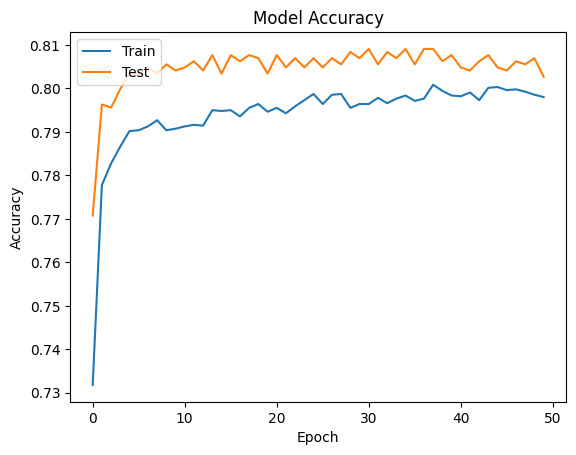

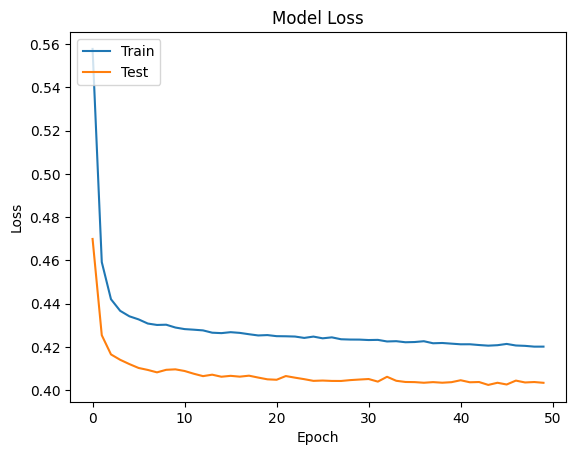

In [6]:
# Step 6: Plotting Accuracy and Loss

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
